In [254]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [255]:
# Analisis descriptivo
data = pd.read_csv('bike_rentals.csv',sep=',')
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2011.0,January,no,Saturday,no,Cloudy,4.110847,3.18125,80.5833,10.749882,985
1,2,spring,2011.0,January,no,Sunday,no,Cloudy,4.902598,2.68695,69.6087,16.652113,801
2,3,spring,2011.0,January,no,Monday,yes,Clear,-1.949076,-5.52975,43.7273,16.636703,1349
3,4,spring,2011.0,January,no,Tuesday,yes,Clear,-1.800000,-4.39390,59.0435,10.739832,1562
4,5,spring,2011.0,January,no,Wednesday,yes,Clear,-0.694763,-3.53650,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,spring,2012.0,December,no,Thursday,yes,Cloudy,0.420847,-3.66790,65.2917,23.458911,2114
727,728,spring,2012.0,December,no,Friday,yes,Cloudy,0.386653,-2.24770,59.0000,10.416557,3095
728,729,spring,2012.0,December,no,Saturday,no,Cloudy,0.386653,-2.88000,75.2917,8.333661,1341
729,730,spring,2012.0,December,no,Sunday,no,Clear,0.489153,-3.41500,48.3333,23.500518,1796


In [256]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    object 
 2   yr          731 non-null    float64
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 74.4+ KB
None


,instant,yr,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,10.312342,8.719556,62.790774,12.757520,4504.348837
std,211.165812,0.500342,7.503943,8.146900,14.207443,5.189975,1937.211452
min,1.000000,2011.000000,-7.575654,-11.046520,0.000000,1.500244,22.000000
25%,183.500000,2011.000000,3.820424,1.892125,52.229150,9.041650,3152.000000
50%,366.000000,2012.000000,10.431653,9.336650,62.750000,12.125057,4548.000000
75%,548.500000,2012.000000,16.872076,15.430100,72.979150,15.624802,5956.000000
max,731.000000,2012.000000,25.328347,27.044800,97.250000,34.000021,8714.000000


In [257]:
# Eliminamos los identificadores porque no nos aportan informacion para entrenar un modelo
data.drop(['instant'], axis=1, inplace=True)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2011.0,January,no,Saturday,no,Cloudy,4.110847,3.18125,80.5833,10.749882,985
1,spring,2011.0,January,no,Sunday,no,Cloudy,4.902598,2.68695,69.6087,16.652113,801
2,spring,2011.0,January,no,Monday,yes,Clear,-1.949076,-5.52975,43.7273,16.636703,1349
3,spring,2011.0,January,no,Tuesday,yes,Clear,-1.800000,-4.39390,59.0435,10.739832,1562
4,spring,2011.0,January,no,Wednesday,yes,Clear,-0.694763,-3.53650,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,spring,2012.0,December,no,Thursday,yes,Cloudy,0.420847,-3.66790,65.2917,23.458911,2114
727,spring,2012.0,December,no,Friday,yes,Cloudy,0.386653,-2.24770,59.0000,10.416557,3095
728,spring,2012.0,December,no,Saturday,no,Cloudy,0.386653,-2.88000,75.2917,8.333661,1341
729,spring,2012.0,December,no,Sunday,no,Clear,0.489153,-3.41500,48.3333,23.500518,1796


In [258]:
label_encoder = LabelEncoder()

columnas_a_codificar = ['season', 'mnth', 'weekday', 'weathersit']

for columna in columnas_a_codificar:
    # Codificamos la columna
    data[columna + '_encoded'] = label_encoder.fit_transform(data[columna])
    # Eliminamos la anterior columna de string
    data.drop(columna, axis=1, inplace=True)


In [259]:
# Ahora habria que pasar las columnas cuyos valores sean yes/no a tipo bool
columnas_bool = ['holiday','workingday']

for columna in columnas_bool:
    data[columna] = data[columna].astype(bool)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  731 non-null    float64
 1   holiday             731 non-null    bool   
 2   workingday          731 non-null    bool   
 3   temp                731 non-null    float64
 4   atemp               731 non-null    float64
 5   hum                 731 non-null    float64
 6   windspeed           731 non-null    float64
 7   cnt                 731 non-null    int64  
 8   season_encoded      731 non-null    int32  
 9   mnth_encoded        731 non-null    int32  
 10  weekday_encoded     731 non-null    int32  
 11  weathersit_encoded  731 non-null    int32  
dtypes: bool(2), float64(5), int32(4), int64(1)
memory usage: 47.2 KB


In [260]:
# El proximo paso seria eliminar los outliers
# Creamos un array para almacenar los indices de los datos que contenga al menos un outlier en alguno de sus atributos
outliers = []
# Seleccionamos las columnas que no sean booleanas
columnas = ['yr','temp','atemp','hum','windspeed','season_encoded','mnth_encoded','weekday_encoded','weathersit_encoded','cnt']

for columna in columnas:
  # Calculamos los cuartiles de la lista de medias
  Q1 = np.quantile(data[columna],0.25)
  Q3 = np.quantile(data[columna],0.75)

  # Rango Intercuartílico
  IQR = Q3 - Q1

  # La k es el valor que afecta a la sensibilidar a la deteccion de outliers.
  # Una k menor implica que el codigo sera mas sensible a los outliers,
  # y una k mayor hara que sea menos sensible.
  # Yo prefiero optar por una mayor sensibilidad a la hora de detectar outliers
  k = 1.5

  # Limites inferior y superior del rango intercuartílico
  xL = Q1 - k * IQR
  xU = Q3 + k * IQR

  for j in range(len(data)):
    if data[columna][j] < xL or data[columna][j] > xU:
      print('Eliminado outlier:',columna,'=', data[columna][j])

      if j not in outliers:
        outliers.append(j)

data = data.drop(outliers)
data.reset_index(drop=True, inplace=True)

data.describe()
data.info()

Eliminado outlier: hum = 18.7917
Eliminado outlier: hum = 0.0
Eliminado outlier: windspeed = 27.999836
Eliminado outlier: windspeed = 34.000021
Eliminado outlier: windspeed = 25.833257
Eliminado outlier: windspeed = 26.000489
Eliminado outlier: windspeed = 28.292425
Eliminado outlier: windspeed = 27.833743
Eliminado outlier: windspeed = 27.417204
Eliminado outlier: windspeed = 28.250014
Eliminado outlier: windspeed = 29.584721
Eliminado outlier: windspeed = 27.7916
Eliminado outlier: windspeed = 25.917007
Eliminado outlier: windspeed = 26.666536
Eliminado outlier: windspeed = 27.292182
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  717 non-null    float64
 1   holiday             717 non-null    bool   
 2   workingday          717 non-null    bool   
 3   temp                717 non-null    float64
 4   ate

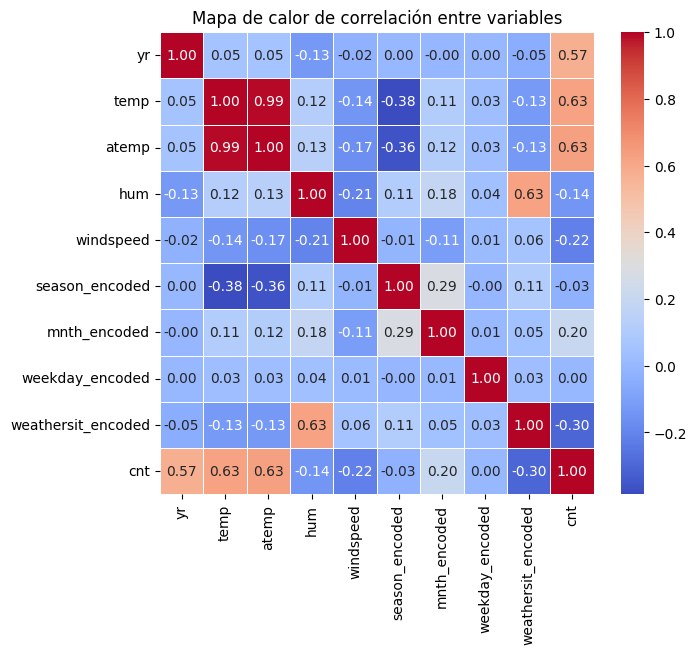

In [261]:
# Una vez preparados y limpios los datos, vamos a comprobar si existe correlacion y eliminar las columnas que toque
# Correlacion de variables
correlacion = data[['yr','temp','atemp','hum','windspeed','season_encoded','mnth_encoded','weekday_encoded','weathersit_encoded','cnt']].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

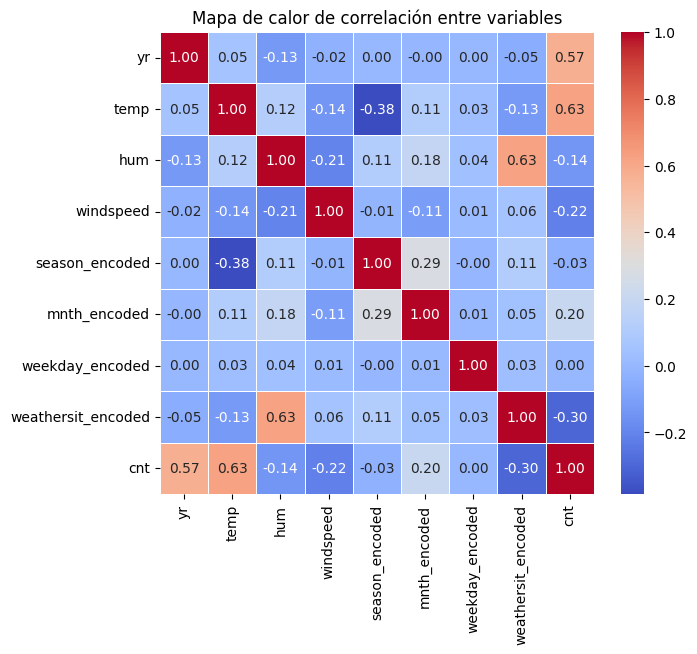

In [262]:
# Como vemos hay una correlacion muy alta entre dos campos:
# atemp - temp
# Asi que eliminaremos uno de la pareja
columnas_eliminar = ['atemp']

# Eliminamos las columnas que he creido menos importantes de cada pareja
data.drop(columns=columnas_eliminar,axis=1, inplace=True)

# Correlacion de variables
correlacion = data[['yr','temp','hum','windspeed','season_encoded','mnth_encoded','weekday_encoded','weathersit_encoded','cnt']].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()
# Ahora podemos ver que no existe correlacion entre los datos

In [263]:
X = data[['yr','temp','hum','windspeed','season_encoded','mnth_encoded','weekday_encoded','weathersit_encoded']]
y = data['cnt']
# Una vez separados los datos en X e y podemos entrenar nuestro modelo

In [264]:
# Creamos el modelo de regresion. En este caso el lineal
modelo1 = LinearRegression()

# Crear dos lista numpy vacias
scoreTrain=np.array([])
scoreTest=np.array([])

# Creamos un bucle de 100 iteraciones
for i in range(0,1000):

    # En cada iteracion hacemos una division de los datos y entrenamos el modelos con esos valores
    # Stratify es muy importante porque hace que se cojan los datos en la proporcion que le pasemos en el train size:
        # El 50% de los peces de tipo 0, el 50% de los peces de tipo 1...
    XTrain, XTest, yTrain, yTest = train_test_split(X,y,stratify=X['mnth_encoded'], train_size=0.5)
    modelo1.fit(XTrain,yTrain)

    # Agregamos el score del train y test a sus respectivas listas
    scoreTest = np.append(scoreTrain,modelo1.score(XTrain,yTrain))
    scoreTrain = np.append(scoreTest,modelo1.score(XTest,yTest))

# Mostramos las medias de los scores obtenidos en las 100 iteraciones tanto para el test como para el train
print('Resultados del modelo de regresion lineal')
print('Score train:',scoreTrain.mean())
print('Score test:',scoreTest.mean())

Resultados del modelo de regresion lineal
Score train: 0.7961508055917346
Score test: 0.7961588401449463
